# 1. Newsgroup dataset

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. In this assignment we are going to use a **subset** of this dataset to learn a bit about unsupervised learning methods in machine learning. To load this dataset we are going to use scikit-learn library which you have worked with a couple of times through semester.

# 2. Loading data and preprocessing

To ensure that your results are reproducable make sure to set the seed value.

In [122]:
import numpy as np
import os
import sys

os.chdir('C:\\Users\\17164\\Desktop\Python\\ML_Assignment\\assignment4')
SEED = 123
np.random.seed(SEED)

## 2.1. downloading and loading data

You can download both training set and test set separately using sklearn apis. [Here](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) you can find sample codes for loading dataset.

In [123]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import re

# YOUR CODE HERE  
def clean_data(data):
    #remove email
    modified_data = re.sub('([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,})','', data)
    modified_data = " ".join(modified_data.split())
    #remove new line
    modified_data = re.sub(r'\s+',' ',modified_data)
    #remove alphanumeric words
    modified_data = re.sub(r'([a-zA-Z]*\d+[a-zA-Z]+|[a-zA-Z]+\d+[a-zA-Z]*)',' ',modified_data)    
    #remove special characters
    modified_data = re.sub(r'[!,*)@#%(&$_?.^]', '',modified_data)
    #remove small words
    modified_data = re.sub(r'\W*\b\w{1,2}\b','',modified_data)
    modified_data = modified_data.lower()
    return modified_data



newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers,footers','quotes'))
df_221 = pd.DataFrame(newsgroups_train.target_names)
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers,footers','quotes'))
dict_train = {'newstitle':newsgroups_train.data,'target':list(newsgroups_train.target)}
newsgroups_train_df=pd.DataFrame(dict_train)
print(newsgroups_train_df)
dict_test = {'newstitle':newsgroups_test.data,'target':list(newsgroups_test.target)}
newsgroups_test_df = pd.DataFrame(dict_test)
newsgroups_train_df['newstitle'] = newsgroups_train_df['newstitle'].apply(clean_data)
newsgroups_test_df['newstitle'] = newsgroups_test_df['newstitle'].apply(clean_data)
print(newsgroups_train_df)
newsgroups_train_df.to_csv('newsgroup_train.csv')

                                               newstitle  target
0      From: lerxst@wam.umd.edu (where's my thing)\nS...       7
1      From: guykuo@carson.u.washington.edu (Guy Kuo)...       4
2      From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4
3      From: jgreen@amber (Joe Green)\nSubject: Re: W...       1
4      From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14
...                                                  ...     ...
11309  From: jim.zisfein@factory.com (Jim Zisfein) \n...      13
11310  From: ebodin@pearl.tufts.edu\nSubject: Screen ...       4
11311  From: westes@netcom.com (Will Estes)\nSubject:...       3
11312  From: steve@hcrlgw (Steven Collins)\nSubject: ...       1
11313  From: gunning@cco.caltech.edu (Kevin J. Gunnin...       8

[11314 rows x 2 columns]
                                               newstitle  target
0      from: where thing subject: what car this nntp-...       7
1      from: guy kuo subject clock poll - final call ...       4

## 2.2 filtering target classes

Explore dataset and get familiar with it. Then, implement `filter_split_x_y` function which extracts `selected_targets` classes from data and splits the data into two lists of X and ys. Please don't change `selected_targets` list is this cell.


In [148]:

selected_targets = [1, 7, 10, 13, 15, 16, 17]

def filter_split_X_y(raw_data, selected_targets):
    """
    This function inputs a newsgroup dataset and filters it based on your selected labels
    then returns two lists of datapoints and labels separately
    
    """
    result_data = raw_data[raw_data['target'].isin(selected_targets)]
    return result_data['newstitle'],result_data['target']
    # YOUR CODE HERE
    

train_x, train_y = filter_split_X_y(newsgroups_train_df, selected_targets)
test_x, test_y = filter_split_X_y(newsgroups_test_df, selected_targets)
# print(train_y.iloc[0],train_y.iloc[1])


7 1


**2.2.1.** Print the name of classes in your training set along with `selected_targets` you can use `target_names` attribute of `newsgroups_train`. Make sure you include this output in your PDF report.

In [125]:
df_221_ans = df_221.iloc[selected_targets]
df_221_ans.columns=['target_names']
df_221_ans.index.name = 'target'
#df_221_ans.to_csv('df_221.csv')

## 2.3. vectorizing documents

There are several ways that one can use to vectorize a whole document. In this programming assignment we are going to use **TF-IDF** method. Please go ahead and watch [this short video](https://www.youtube.com/watch?v=D2V1okCEsiE) to understand how tf-idf works and then answer the following questions.

**2.3.1.** What does TF-IDF stand for?<br>
**2.3.2.** Why don't we only use term frequency of the words in a document as its feature vector? what is the benefit of adding inverse document frequency?<br>
**2.3.3.** Calculate the tf-idf vectors of the following two documents, assuming this is the entire corpus:
![Documents](tfidf.png)


Now we are going to use scikit-learn to calculate the tf-idf vectors of each document in our twenty newgroups dataset. Write a function that accepts both `train_x` and `test_x` and returns the tf-idf vectors of them in numpy format.

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_dataset(train_x, test_x):
    """
    returns vectorized numpy array of training and test set
    """
    vectorizer = TfidfVectorizer(stop_words='english', min_df=2)
    train_vec = vectorizer.fit_transform(train_x)
    test_vec = vectorizer.transform(test_x)
    return train_vec.toarray(),test_vec.toarray()
    # YOUR CODE HERE
    
train_vec, test_vec = vectorize_dataset(train_x, test_x)
print(train_vec.shape,test_vec.shape)

(4081, 22610) (2718, 22610)


# 3. dimension reduction

In the previous section we built features vectors for each of the documents. However, these feature vectors are highly sparse and are not easy to cluster or visualize.

## 3.1. Sparsity

Answer these questions to understand the sparsity of these vectors:

**3.1.1** Count the number of non-zeros in each row of the `train_vec` matrix.<br>
**3.1.2** What is the average number non zero elements in each row? <br>
**3.1.3** On average what percentage of elements in each row have non-zero elements?<br>

In [132]:

train_vec_df = pd.DataFrame(train_vec)
print(train_vec_df.shape)
# test_vec_df = pd.DataFrame(test_vec)
count_non_zero = (train_vec_df!=0).astype(int).sum(axis=1)

#3.1.1 count_non_zero
count_non_zero_list = count_non_zero.tolist()
# print(count_non_zero_list)
#3.1.2 count_non_zero_avg
count_non_zero_avg = sum(count_non_zero_list)/len(count_non_zero_list)
print(count_non_zero_avg)
# count_non_zero_list_avg = count_non_zero_list.
count_non_zero_perc = (train_vec_df!=0).astype(int).mean(axis=1)
count_non_zero_perc = count_non_zero_perc*100
#3.1.3 average percentage of elements
count_non_zero_perc_list = count_non_zero_perc.tolist()
# print(count_non_zero_list[0]/52057)
# print(count_non_zero_perc_list[0])

(4081, 22610)
80.6522911051213


## 3.2. SVD

Use `TruncatedSVD` module in scikit-learn to perform SVD on the dataset. Reduce your dimensions to 3 and perfomr SVD for 100 iterations (**note: the number of iterations parameter is a special component for an alternative way to solve SVD that we did not study in class. You do not need to know what it means**). Make sure to use the random seed given at the beginning of the notebook.

**Note: you should only fit your SVD/UMAP models on train data**

**3.2.1.** What portion of the variance in your dataset is explained by each of the SVD dimensions?

In [133]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

def fit_and_transform_svd(train_vec, test_vec):
    """
    trains a svd model and generate reduced dimension vectros from training and test dataset
    returns: 2 numpy arrays of size <number of documents>*3
    """
    # YOUR CODE
    train_vec_csr = csr_matrix(train_vec)
    test_vec_csr = csr_matrix(test_vec)
    svd = TruncatedSVD(n_components=3, n_iter=100, random_state=SEED)
    train_svd = svd.fit_transform(train_vec)
    print(svd.explained_variance_ratio_)
    test_svd = svd.transform(test_vec)
    return train_svd,test_svd
    


# print(type(train_vec),type(test_vec))    
train_svd, test_svd = fit_and_transform_svd(train_vec, test_vec)

[0.00166477 0.00782159 0.00513792]


## 3.3 UMAP

UMAP is another dimensionality reduction method that works in a more complex way. [This video](https://www.youtube.com/watch?v=6BPl81wGGP8) explains on a high level how it performs dimension reduction.
Apply UMAP and get the embeddings for both training and test datasets. Use the previously given `random_state` and reduce dimensions to 3. Also use **cosine similarity** as the similarity metric of UMAP:

- n_components=3
- metric='cosine'
- random_state=SEED
- low_memory=True

In [178]:
!jupyter nbextension enable --py widgetsnbextension
import umap.umap_ as umap

def fit_and_transform_umap(train_vec, test_vec):
    # YOUR CODE
    train_vec_csr = csr_matrix(train_vec)
    test_vec_csr = csr_matrix(test_vec)
    reducer = umap.UMAP(n_components=3,metric='cosine',random_state=SEED,low_memory=True)
    train_umap = reducer.fit_transform(train_vec_csr)
    test_umap = reducer.transform(test_vec_csr)
    return train_umap,test_umap
        
    
    
train_umap, test_umap = fit_and_transform_umap(train_vec, test_vec)
print(train_umap)
print(train_y.shape)

[[10.794022   7.2087216  6.9816403]
 [ 9.336758   7.152898   6.733288 ]
 [10.187036   4.243911   5.740733 ]
 ...
 [ 7.936164   4.2270384  8.144936 ]
 [ 9.421621   8.165297   3.2106261]
 [ 9.329345   9.461858   7.011171 ]]
(4081,)


## 3.4. visualization

install `babyplots` library which provides some nice 3D visaulizations. Then, visualize both of embeddings (SVD and UMAP) of the **training data** using the given function. **make sure you put a screenshot of the visualizations inside your write up**. You can use it to explain your answers to the questions.

<span style="color:red"> Please don't use babyplot inside <b>jupyter lab</b> as it is still not fully supported and produces some errors </span>

Hint: you need to run the function in a separate cell to get the visualization

**3.4.1.** Based on your observation, what is the difference between SVD and UMAP embeddings? 1-2 sentences should suffice.<br>
**3.4.2.** Which one do you prefer to use for a classification task? why? 1-2 sentences should suffice <br>

In [129]:
from babyplots import Babyplot

def visualize(datapoints, labels):
    bp = Babyplot(background_color="#ffffffff", turntable=True)
    bp.add_plot(
        datapoints,
        "pointCloud",
        "categories",
        np.array(labels).tolist(),
        {
            "colorScale": "Dark2", 
            "showLegend": True
        }
    )
    return bp
print(type(train_svd))

<class 'numpy.ndarray'>


In [23]:
# train_umap_df = pd.DataFrame(train_umap)
# train_umap_df[['umap1','umap2','umap3']] = pd.DataFrame(train_umap_df[:,0].tolist())
# print(train_umap_df.columns)
#print(train_umap_df[:,0])
#visualize(train_umap_df[:,0], train_y[:,0])

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
visualize(train_svd, train_y)

# 4. Kmeans clustering



In this part we are going to perform KMeans clustering on the generated embeddings of our training dataset. One major challenge with KMeans is to find the optimum number of clusters to use for clustering. Here, based on our training data, we know that there are 7 clusters in the dataset. However, we want to find the number of optimum clusters solely based on our data. In this part we are going to use [`average silhouette coefficient`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) to evaluate our clustering


## 4.1. clustering and evaluation

**4.1.1** What is the range of possible values of silhouette coefficients? <br>
**4.1.2** Describe what a silhouette score of -1 and 1 mean?<br>
**4.1.3.** Use `silhouette score` and `KMeans` from sklearn library to find the optimum number of clusters in your `train_umap`. Don't forget to use `SEED` as your kmeans `random_seed`. In order to do this try different values of cluster numbers from 5 to 20. Choose the one that results in the best score. <br>
**4.1.4.** Plot silhouette score for different values of `n_clusters` (a plot with `n_clusters` on the x-axis and silhouette score on the y-axis) and find the best value for `n_cluster`. Don't forget to put the plot in your report.

[0.44696507, 0.47828412, 0.528198, 0.5435378, 0.5126849, 0.4913677, 0.46693286, 0.44638035, 0.402731, 0.38515982, 0.4060188, 0.38008505, 0.3413049, 0.37680143, 0.32109305, 0.34443414]
The best silhouette score is at n = 8
CPU times: total: 51.1 s
Wall time: 9.13 s


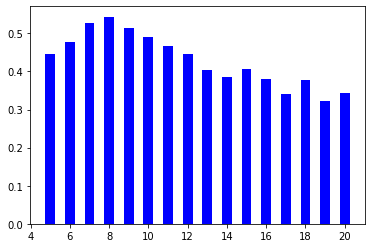

In [142]:
%%time

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def get_clustering_scores(train_vectors,n_for_clusters) -> KMeans:
    """
    This function calculates KMeans model for different values of n_cluster and calculates silhouette score
    for each of them. Then it returns a list of silhouette scores
    RETURNS: 
        list of scores
    """
    # YOUR CODE
    clustering_scores = []
    for n in n_for_clusters:
        km = KMeans(n_clusters=n,random_state=SEED)
        km.fit_predict(train_vectors)
        clustering_scores.append(silhouette_score(train_vectors,km.labels_,metric='euclidean'))
    
    return clustering_scores
    

n_for_clusters = np.arange(5,21)
clustering_scores = get_clustering_scores(train_umap,n_for_clusters)
print(clustering_scores)
## plot scores
# YOUR CODE
#fig = plt.figure(figsize = (10, 5))
plt.bar(n_for_clusters,clustering_scores,color='blue',width=0.5)
plt.xlabel = 'n for kmeans'
plt.ylabel = 'silhouette scores'


## Find best number of clusters
# YOUR CODE
best_cluster = clustering_scores.index(max(clustering_scores))+5
print('The best silhouette score is at n =',best_cluster)

## 4.2. Making a kmeans classifier

Now that we have the best number of clusters, run KMeans again with the best number of clusters associated with the best sihouette score (on `train_umap`). 

After running KMeans you get some number of clusters but each of them have some cluster label that does not necessarily match the trainig labels. Try to implement `get_cluster_mapping` function that inputs your KMeans model and the training labels and returns a dictionary that maps each of the cluster labels to one of the training labels. For example your cluster 0 might correspond to training label of 17.

Hint: In your `get_cluster_mapping` function, find the training label of the majority of data points in each cluster. For example, if your cluster 0 contains 100 data points of label 12 and 5 data points of label 15, the majority of data points in cluster 0 come from label 12. Therefore, your output dictionary should contain the mapping `0: 12`

**4.2.1** show your mapping (resulted dictionary) inside your project report.


In [182]:

# Run KMeans again with best parameter you calculated in the previous section
# YOUR CODE HERE

###


def get_cluster_mapping(clustering: KMeans, original_labels):
    """
    input: a clustering and original labels of the data
    returns: a dictionary that maps each cluster number to an original label
    """
    # YOUR CODE HERE
    labels_array = np.array(clustering.labels_)
    #print('The shape of label array is',labels_array)
    orignal_labels_array = np.array(original_labels)
    #Never use this!!!!!
    #labels_list = [[]]*8
    labels_list =  [[] for _ in range(8)]
    #print(labels_list[0])
    for i,val in enumerate(labels_array):
        labels_list[val].append(orignal_labels_array[i])
    #print(labels_list)
    mapping_list = []      
    for i in range(8):
        mapping_list.append(max(set(labels_list[i]),key=labels_list[i].count))
    return dict(enumerate(mapping_list))

    
    

# Feed the generated kmeans clustering and your training labels to the following function
clustering = KMeans(n_clusters=best_cluster,random_state=SEED)
clustering.fit_predict(train_umap) 
# print(len(clustering.labels_.tolist()),len(train_y))
cluster_mapping = get_cluster_mapping(clustering, train_y)
print(cluster_mapping)

17


## 4.3. Analyzing clusters

**4.3.1.** Are there any two clusters in your clustering output with the same training label (for example, are there two clusters which both have same training label)? Use your visualizations and describe why?<br>
**4.3.2.** Write the function bellow that returns nearest samples to a cluster center. Use this function and explain why there are overlaps in your labels? <br>
**4.3.3.** Can you infere the overlapping label(s) by checking out most central samples? check with original labels.<br>

In [180]:
from scipy.spatial.distance import cdist

def most_central_samples(clustering: KMeans, cluster_id, k=3):
    """
    returns the text of k most central samples in the specified cluster_id
    """
    # YOUR CODE
    centroid = clustering.cluster_centers_[cluster_id]
    center = [centroid]
    euclidean_distances = cdist(train_umap,center,'euclidean')
    euclidean_distances.sort()
    return euclidean_distances[-3:]
    
closest_centers = []
for i in range(8):    
    closest_centers.append(most_central_samples(clustering,i))

print(closest_centers)

[array([[0.67278146],
       [6.1427601 ],
       [4.92964456]]), array([[4.61742887],
       [6.18981367],
       [2.63959952]]), array([[3.32876964],
       [4.49367119],
       [4.97672672]]), array([[5.93905546],
       [0.73549631],
       [3.4188946 ]]), array([[4.02174554],
       [3.61724857],
       [5.06828474]]), array([[4.36124739],
       [3.80402318],
       [2.55819378]]), array([[2.9785536 ],
       [7.0123149 ],
       [5.83581698]]), array([[4.68154335],
       [3.42995119],
       [1.28442955]])]


## 4.4. evaluate your kmeans model on test dataset

**4.4.1.** Using the generated mapping, and your clustering model, predict the labels of test dataset (you can use the embeddings of test data that you generated by umap `test_umap`) <br>
**4.4.2.** Calculate the accuracy of model <br>
**4.4.3.** Calculate both micro and macro values of precision, recall and F1 score <br>

In [187]:
# YOUR CODE HERE
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
pred_y = clustering.predict(test_umap)
for i in range(len(pred_y)):
    pred_y[i] = cluster_mapping[pred_y[i]]
accuracy = np.mean(np.array(pred_y)==np.array(test_y))
print(accuracy)
precisionScore_micro = precision_score( test_y, pred_y,average='micro')
precisionScore_macro = precision_score( test_y,pred_y,average='macro')
print(precisionScore_micro,precisionScore_macro)
recall_micro = recall_score( test_y, pred_y,average='micro')
recall_macro = recall_score( test_y, pred_y,average='macro')
print(recall_micro,recall_macro)
f1score_micro = f1_score( test_y, pred_y,average='micro')
flscore_macro = f1_score( test_y, pred_y,average='macro')
print(f1score_micro,flscore_macro)

0.8612950699043415
0.8612950699043415 0.866399681506863
0.8612950699043415 0.861630324952893
0.8612950699043415 0.8598106141169206


# **574 Only** 5.1 KNN classification

Using sklearn `KneighborsClassifier`, classify news data. Then, evaluate your model using the test set.

**5.1.1.** Train two seperate KNN models on both SVD and UMAP embeddings. Use `n_neighbors=100`. <br>
**5.1.2.** Evaluate your model on test datas (`test_umap` and `test_svd`). Which model performs better? Why? <br>
**5.1.3.** Calculate macro and micro precision recall and fscore for `test_umap`. Which one of the two do you prefer for evaluating your model? why? <br>
**5.1.4.** Shortly describe why the two sets of values (macro and micro) are so similar in this case. <br>

In [189]:
#YOUR CODE
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(train_umap,train_y)
y_pred_umap = knn.predict(test_umap)
accuracy_umap = accuracy_score(test_y,y_pred_umap)
print(accuracy_umap)
knn.fit(train_svd,train_y)
y_pred_svd = knn.predict(test_svd)
accuracy_svd = accuracy_score(y_pred_svd,test_y)
print(accuracy_svd)
# precisionScore_micro_umap = precision_score( test_y, pred_y,average='micro')
# precisionScore_macro = precision_score( test_y,pred_y,average='macro')
# print(precisionScore_micro,precisionScore_macro)
# recall_micro = recall_score( test_y, pred_y,average='micro')
# recall_macro = recall_score( test_y, pred_y,average='macro')
# print(recall_micro,recall_macro)
# f1score_micro = f1_score( test_y, pred_y,average='micro')
# flscore_macro = f1_score( test_y, pred_y,average='macro')
# print(f1score_micro,flscore_macro)

0.862766740250184
0.45916114790286977
